In [3]:
#importan librerias
#Librerias base
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import os
import cv2
import tensorflow as tf
import pandas as pd
import scikitplot as skplt
from glob import glob 
#Librerias de modelado
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [4]:

def BaseModel(input_shape=(224, 224, 3)):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape = input_shape ))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    return model

model = BaseModel()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [5]:
#Funcion para leer las imagenes de un folder
def load_folder_with_label(folder_path, size = (128,128), end_path = "*"):
    files = glob(os.path.join(folder_path, end_path))
    label = os.path.basename(folder_path).strip().lower().replace(" ","_")
    X = map(plt.imread, files)
    X = map(lambda img: cv2.resize(img, size), X)
    X = list(X)
    y = [label] * len(X)
    return X,y 

In [6]:
size = (64,64)

In [7]:
data = pd.read_csv("data/traffic_sign/Train.csv")
files = list(data["Path"])
y = list(data["ClassId"])
data[["img_id","size_id"]] = data["Path"].str.rsplit(pat = "_",n = 1, expand = True)

In [8]:
train_size = .66
ids_= list(data["img_id"].unique())
ids_train,ids_val = train_test_split(ids_,stratify=[file.rsplit("_")[0] for file in ids_ ],train_size = train_size)

In [9]:
X_train = data.loc[data["img_id"].isin(ids_train), "Path" ]
y_train = data.loc[data["img_id"].isin(ids_train), "ClassId" ]
X_val = data.loc[data["img_id"].isin(ids_val), "Path" ]
y_val = data.loc[data["img_id"].isin(ids_val), "ClassId" ]

In [10]:
files = list(X_train)
y_train = list(y_train)
X_train = map(lambda file: plt.imread(os.path.join("data/traffic_sign/", file)), files)
X_train = map(lambda img: cv2.resize(img, size), X_train)
X_train = list(X_train)

In [11]:
X_train = np.array(X_train)
X_train = (X_train*255).round().astype("uint8")
X_train[0]

array([[[ 43,  35,  35],
        [ 43,  35,  35],
        [ 42,  35,  35],
        ...,
        [ 97, 106, 119],
        [ 99, 110, 125],
        [100, 112, 128]],

       [[ 43,  35,  36],
        [ 42,  35,  35],
        [ 42,  35,  35],
        ...,
        [ 96, 105, 119],
        [ 98, 109, 124],
        [ 98, 110, 127]],

       [[ 42,  36,  36],
        [ 42,  35,  36],
        [ 41,  35,  35],
        ...,
        [ 95, 103, 120],
        [ 95, 105, 123],
        [ 96, 107, 125]],

       ...,

       [[ 34,  27,  27],
        [ 34,  27,  27],
        [ 34,  28,  28],
        ...,
        [ 42,  33,  30],
        [ 42,  33,  30],
        [ 43,  33,  30]],

       [[ 34,  28,  27],
        [ 34,  28,  27],
        [ 34,  28,  27],
        ...,
        [ 38,  32,  28],
        [ 38,  32,  29],
        [ 38,  32,  29]],

       [[ 35,  28,  27],
        [ 35,  28,  27],
        [ 35,  28,  27],
        ...,
        [ 37,  31,  27],
        [ 36,  31,  28],
        [ 36,  31,  28]]

In [12]:
y_train = np.array(y_train)
y_train = y_train.astype(int)
y_train = pd.get_dummies(y_train).values
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [13]:
files = list(X_val)
y_val = list(y_val)
X_val = map(lambda file: plt.imread(os.path.join("data/traffic_sign/", file)), files)
X_val = map(lambda img: cv2.resize(img, size), X_val)
X_val = list(X_val)

In [14]:
X_val = np.array(X_val)
X_val = (X_val*255).round().astype("uint8")
X_val[0]

array([[[46, 51, 56],
        [46, 51, 56],
        [47, 51, 56],
        ...,
        [48, 50, 50],
        [47, 49, 49],
        [46, 49, 49]],

       [[46, 51, 56],
        [46, 51, 56],
        [47, 51, 56],
        ...,
        [49, 50, 50],
        [47, 49, 49],
        [46, 49, 49]],

       [[47, 51, 56],
        [47, 51, 56],
        [47, 50, 55],
        ...,
        [50, 52, 51],
        [47, 50, 50],
        [46, 50, 50]],

       ...,

       [[50, 53, 56],
        [50, 53, 56],
        [52, 54, 58],
        ...,
        [88, 88, 61],
        [79, 81, 59],
        [76, 79, 58]],

       [[51, 52, 55],
        [51, 52, 56],
        [53, 54, 58],
        ...,
        [90, 91, 61],
        [82, 86, 61],
        [79, 84, 61]],

       [[51, 52, 55],
        [51, 52, 56],
        [53, 54, 58],
        ...,
        [90, 92, 61],
        [82, 87, 62],
        [80, 85, 62]]], dtype=uint8)

In [15]:
y_val = np.array(y_val)
y_val = y_val.astype(int)
y_val = pd.get_dummies(y_val).values
y_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [16]:
data_test = pd.read_csv("data/traffic_sign/Test.csv")
files = list(data_test["Path"])
y_test = list(data_test["ClassId"])
X_test = map(lambda file: plt.imread(os.path.join("data/traffic_sign/", file)), files)
X_test = map(lambda img: cv2.resize(img, size), X_test)
X_test = list(X_test)

In [17]:
X_test = np.array(X_test)
X_test = np.array(X_test)
X_test = (X_test*255).round().astype("uint8")
y_test = np.array(y_test)
y_test = np.array(y_test)

In [18]:
y_test = y_test.astype(int)
y_test = pd.get_dummies(y_test).values
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
print("X_train shape: ", X_train.shape,"y_train shape: ",y_train.shape,  "img shape: ", len(ids_train))
print("X_val shape: ", X_val.shape,"y_val shape: ",y_val.shape,"img shape: ", len(ids_val))
print("X_test shape: ", X_test.shape,"y_test shape: ",y_test.shape,)

X_train shape:  (25859, 64, 64, 3) y_train shape:  (25859, 43) img shape:  862
X_val shape:  (13350, 64, 64, 3) y_val shape:  (13350, 43) img shape:  445
X_test shape:  (12630, 64, 64, 3) y_test shape:  (12630, 43)


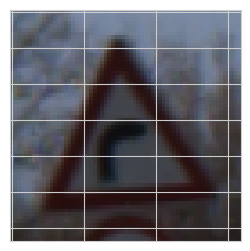

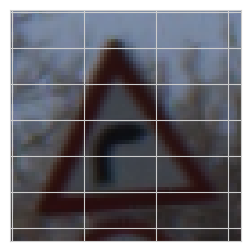

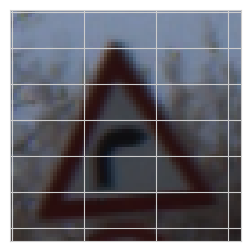

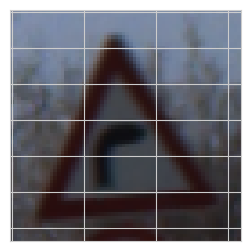

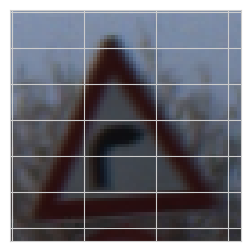

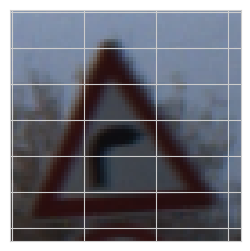

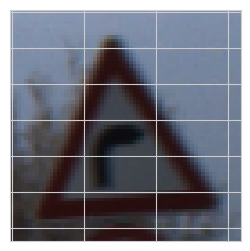

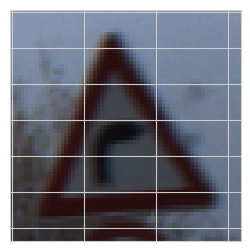

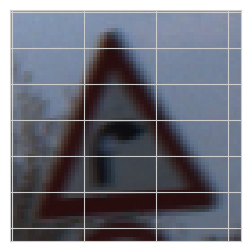

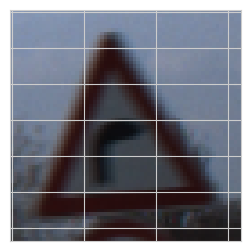

In [20]:
#Vistazo a nuestro dataset
for img in X_train[20:30]:
    plt.figure(figsize = (3,3))
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    plt.imshow(img)
    plt.show()

In [21]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [22]:
X_train.max(),X_train.min()

(151.061, -123.68)

In [23]:
n_classes = y_train.shape[1]

In [24]:
model = BaseModel(input_shape=(size[0],size[1],3),)

In [26]:
top_model = model.output
top_model = Flatten()(top_model)
top_model = Dense(1024, activation = "relu")(top_model)
# top_model = Dense(512, activation = "relu")(top_model)
top_model = Dropout(.5)(top_model)
top_model = Dense(n_classes, activation   = "softmax", )(top_model)

model = Model(inputs = model.input , outputs = top_model)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13_input (InputLayer  [(None, 64, 64, 3)]      0         
 )                                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       147584

In [28]:
model.compile(loss='categorical_crossentropy',
                  optimizer = "adam",
                  metrics=['accuracy',
#                            "AUC",
#                            "Recall"
                          ])

In [26]:
history  = model.fit(X_train, y_train ,batch_size = 32, epochs = 10, validation_data = (X_val,y_val))

Epoch 1/10
809/809 [==============================] - 50s 59ms/step - loss: 2.8688 - accuracy: 0.2132 - val_loss: 1.4506 - val_accuracy: 0.5111
Epoch 2/10
809/809 [==============================] - 46s 57ms/step - loss: 0.7791 - accuracy: 0.7505 - val_loss: 0.5676 - val_accuracy: 0.8331
Epoch 3/10
809/809 [==============================] - 46s 57ms/step - loss: 0.3055 - accuracy: 0.9166 - val_loss: 0.2204 - val_accuracy: 0.9410
Epoch 4/10
809/809 [==============================] - 48s 59ms/step - loss: 0.2288 - accuracy: 0.9416 - val_loss: 0.2749 - val_accuracy: 0.9291
Epoch 5/10
809/809 [==============================] - 48s 59ms/step - loss: 0.2221 - accuracy: 0.9473 - val_loss: 0.2207 - val_accuracy: 0.9575
Epoch 6/10
809/809 [==============================] - 48s 60ms/step - loss: 0.2828 - accuracy: 0.9359 - val_loss: 0.4555 - val_accuracy: 0.9003
Epoch 7/10
809/809 [==============================] - 47s 59ms/step - loss: 0.2963 - accuracy: 0.9344 - val_loss: 0.4440 - val_accuracy:

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

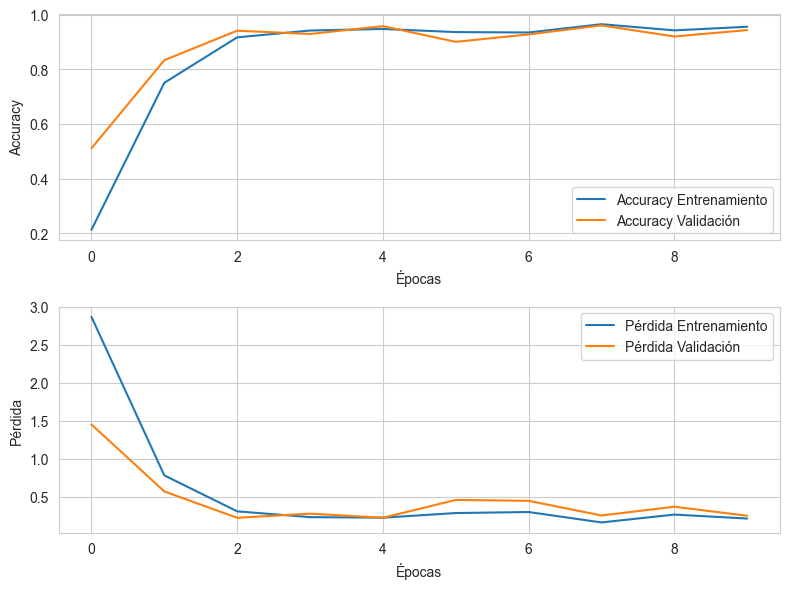

In [28]:
# Obtén los datos del historial
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crea la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Gráfica de accuracy
ax1.plot(accuracy, label='Accuracy Entrenamiento')
ax1.plot(val_accuracy, label='Accuracy Validación')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Gráfica de pérdida
ax2.plot(loss, label='Pérdida Entrenamiento')
ax2.plot(val_loss, label='Pérdida Validación')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Pérdida')
# plt.ylim(None,.8)
ax2.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()


In [ ]:
y_proba_train = model.predict(X_train,batch_size=8)
y_pred_train = y_proba_train.argmax(axis = 1).astype(int)
y_proba_test = model.predict(X_test,batch_size=8)
y_pred_test = y_proba_test.argmax(axis = 1).astype(int)

In [34]:
print("Train sample \n", classification_report(y_train.argmax(axis = 1), y_pred_train, ))
print("Test sample \n", classification_report(y_test.argmax(axis = 1), y_pred_test,))

Train sample 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       150
           1       1.00      0.97      0.98      1470
           2       0.98      0.99      0.99      1470
           3       0.99      0.98      0.98       930
           4       0.99      0.99      0.99      1320
           5       0.90      0.98      0.94      1230
           6       0.96      1.00      0.98       270
           7       0.98      0.98      0.98       960
           8       0.98      0.93      0.96       930
           9       0.97      0.98      0.98       960
          10       0.99      1.00      0.99      1320
          11       1.00      0.98      0.99       870
          12       1.00      0.99      0.99      1380
          13       0.99      1.00      0.99      1440
          14       1.00      0.99      1.00       510
          15       0.95      0.99      0.97       420
          16       0.99      0.94      0.96       270
          17

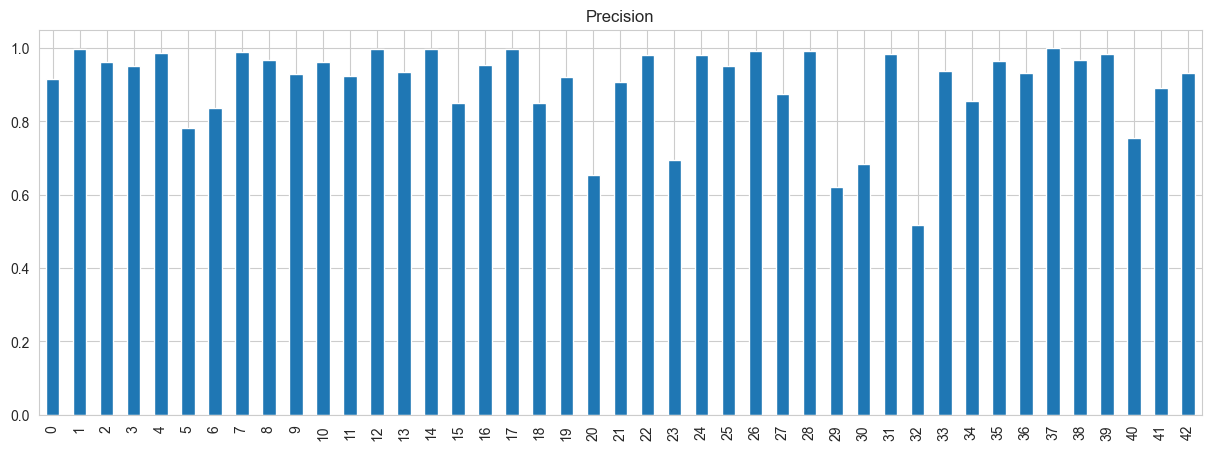

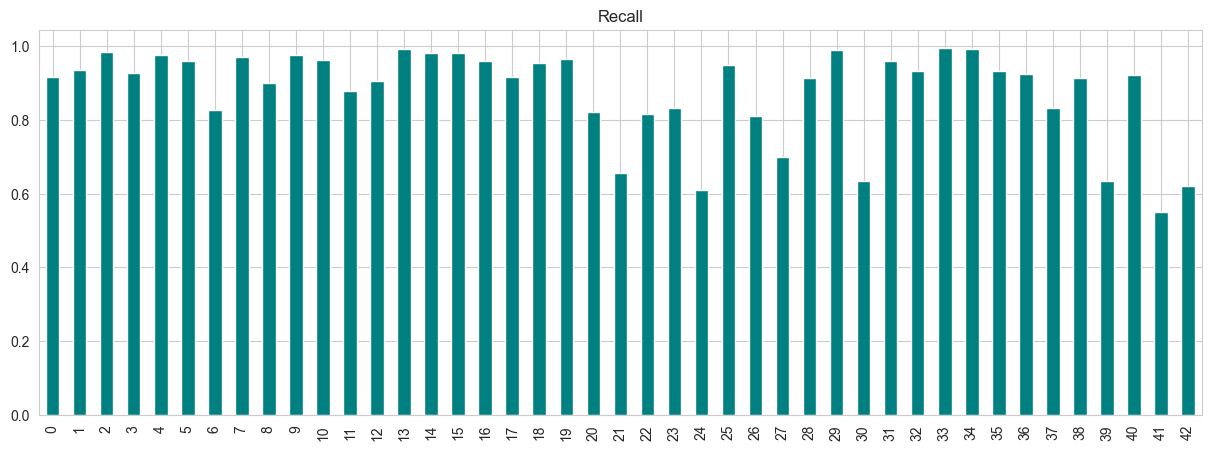

In [73]:
data_metrics = pd.DataFrame(classification_report(y_test.argmax(axis = 1), y_pred_test, output_dict=True,))
data_metrics.loc["precision",:"42"].plot.bar(figsize = (15,5),title = "Precision")
plt.show()
data_metrics.loc["recall",:"42"].plot.bar(figsize = (15,5),title = "Recall",color = "teal")
plt.show()

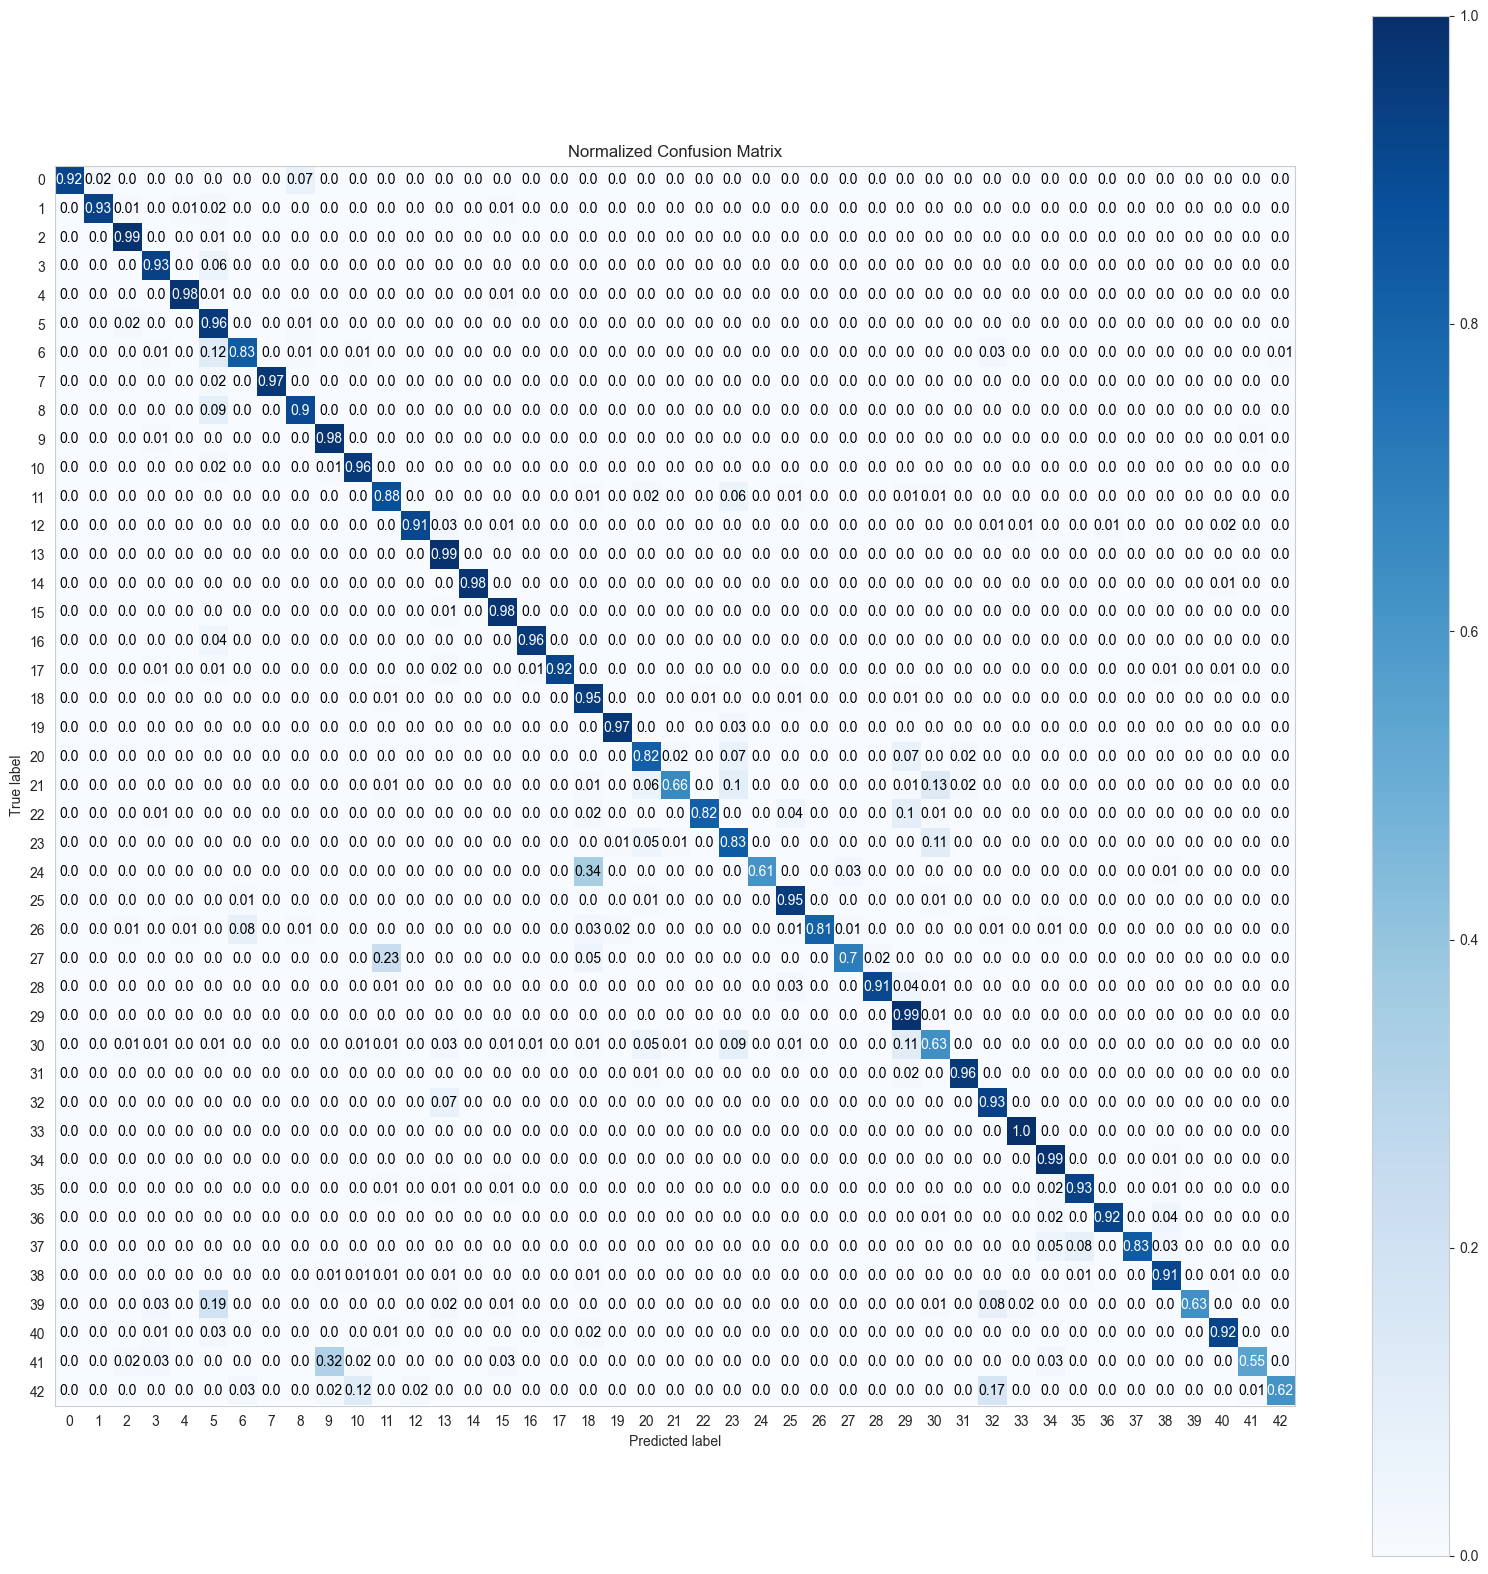

In [42]:
skplt.metrics.plot_confusion_matrix(y_test.argmax(axis = 1), y_pred_test, normalize=True,figsize = (20,20));